**Lab 6** - Laura Ximena Gordillo Maldonado

---



In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Punto 1

In [2]:

# funciones 
# x^2
def f1(x):
    return x*x
#(x-1)^2
def f2(x):
    return f1(x-1)
#x^2-1
def f3(x):
  return f1(x)-1
#x^2+1
def f4(x):
  return f1(x)+1


####$f(x)=x^2$

Text(0, 0.5, 'f(x)')

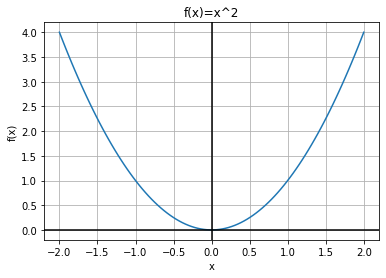

In [3]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f1(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')




####$f(x)=(x-1)^2$

Text(0, 0.5, 'f(x)')

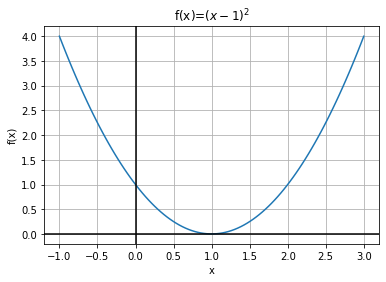

In [4]:
x = np.linspace(-1,3,100)
fig, ax = plt.subplots()
ax.plot(x,f2(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=$(x-1)^2$')
plt.xlabel('x')
plt.ylabel('f(x)')




####$f(x)=x^2-1$

Text(0, 0.5, 'f(x)')

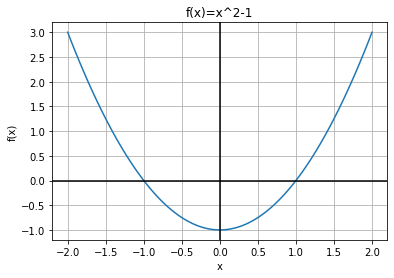

In [5]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f3(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')




####$f(x)=x^2 +1 $

Text(0, 0.5, 'f(x)')

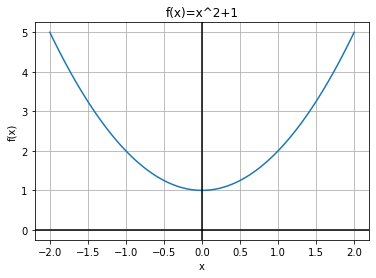

In [6]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f4(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2+1')
plt.xlabel('x')
plt.ylabel('f(x)')




# Punto 2


In [7]:
def classic_method(a, b, c):
  real=(f1(b))-(4*a*c)
  if real>=0:
    return (-b+math.sqrt(real))/(2*a), (-b-math.sqrt(real)/(2*a))
  else:
    return (str(-b+math.sqrt(-real)/(2*a))+'i'), str(-b-math.sqrt(-real)/(2*a))+'i'

def poshenloh_method(b, c):
  real=(f1(b)/4)-c
  if real>=0:
    return ((-b/2)+math.sqrt(real),((-b/2)-math.sqrt(real)))
  else:
    return (str((-b/2)+math.sqrt(-real))+'i'),(str((-b/2)-math.sqrt(-real))+'i')

####$x^2=0 $
  $a=1, b= 0, c=0$
```

In [8]:
print("Raices método clásico: ",classic_method(1, 0,0))
print("Raices método Po Shen Loh: ",poshenloh_method(0,0))

Raices método clásico:  (0.0, 0.0)
Raices método Po Shen Loh:  (0.0, 0.0)


####$(x-1)^2=0 $
  $x^2-2x+1=0$
  
  $a=1, b= 2, c=1$


In [9]:
print("Raices método clásico: ",classic_method(1, 2,1))
print("Raices método Po Shen Loh: ",poshenloh_method(2,1))

Raices método clásico:  (-1.0, -2.0)
Raices método Po Shen Loh:  (-1.0, -1.0)


####$x^2-1=0 $
  $a=1, b= 0, c=-1$


In [10]:
print("Raices método clásico: ",classic_method(1, 0,-1))
print("Raices método Po Shen Loh: ",poshenloh_method(0,-1))

Raices método clásico:  (1.0, -1.0)
Raices método Po Shen Loh:  (1.0, -1.0)


####$x^2+1=0 $
  $a=1, b= 0, c=1$


In [11]:
print("Raices método clásico: ",classic_method(1,0,1))
print("Raices método Po Shen Loh: ",poshenloh_method(0,1))

Raices método clásico:  ('1.0i', '-1.0i')
Raices método Po Shen Loh:  ('1.0i', '-1.0i')


# Punto 3

####$z^2 $

In [12]:

def f(z):
    return z**2

def df(z):
    return 2*z
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1, r2 = poshenloh_method(0,0)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - 2*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


######Zoom out

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


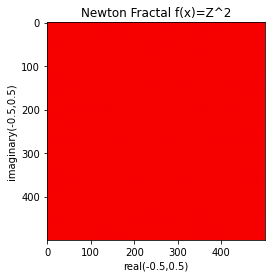

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


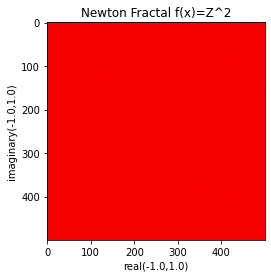

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


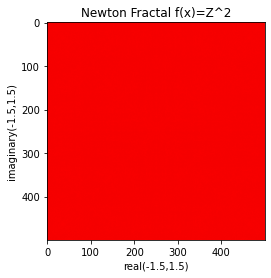

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


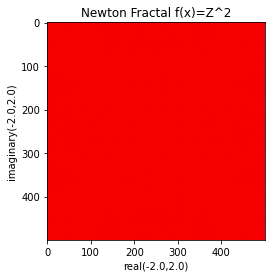

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


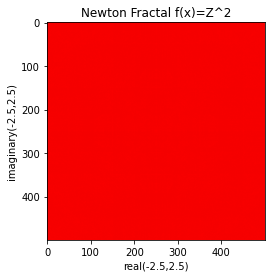

In [13]:

display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)


######Zoom in

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


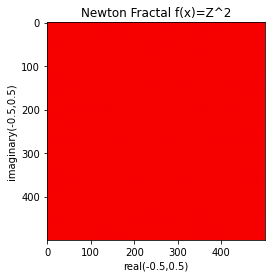

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


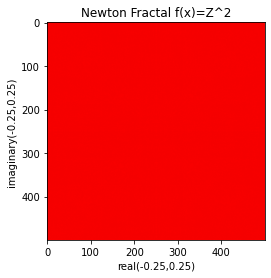

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


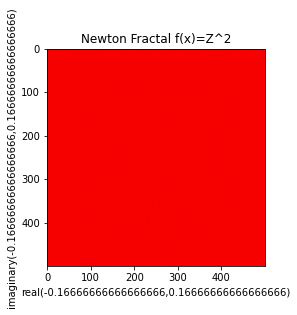

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


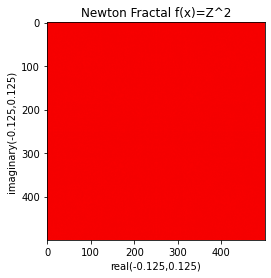

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


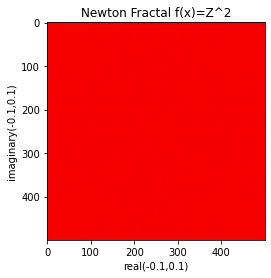

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


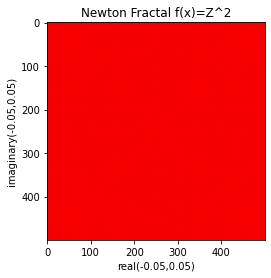

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


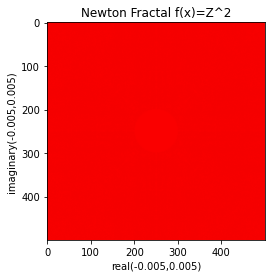

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


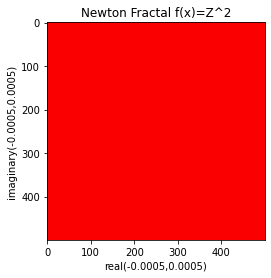

In [14]:
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

####$(z-1)^2 $

In [15]:

def f(z):
    return (z-1)**2

def df(z):
    return 2*(z-1)
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-1 # max error allowed

    # Bounding roots
    r1 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=1, z_c_i=0, zh = 2, zw=2, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=$(z-1)^2$')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


######Zoom out

Z region from ( 0.0 , -1.0 ) to ( 2.0 , 1.0 )


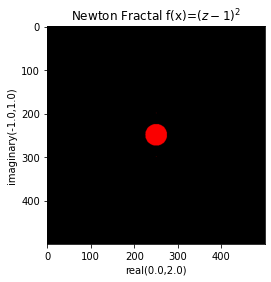

Z region from ( -1.0 , -2.0 ) to ( 3.0 , 2.0 )


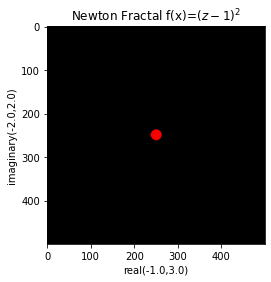

Z region from ( -2.0 , -3.0 ) to ( 4.0 , 3.0 )


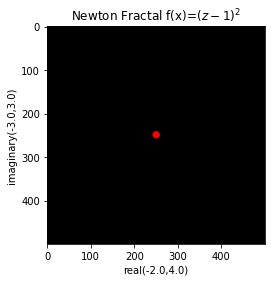

Z region from ( -3.0 , -4.0 ) to ( 5.0 , 4.0 )


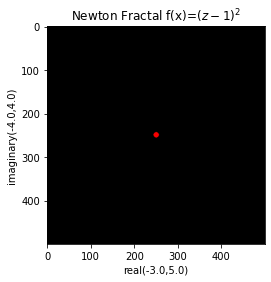

Z region from ( -4.0 , -5.0 ) to ( 6.0 , 5.0 )


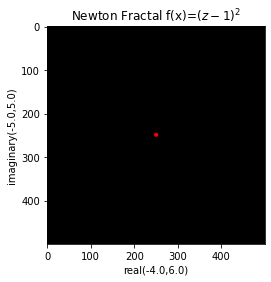

In [16]:

display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)


######Zoom in

Z region from ( 0.0 , -1.0 ) to ( 2.0 , 1.0 )


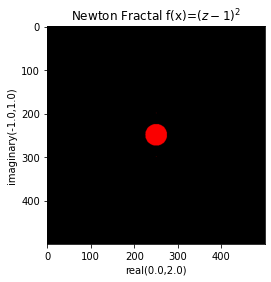

Z region from ( 0.5 , -0.5 ) to ( 1.5 , 0.5 )


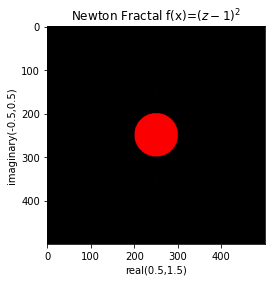

Z region from ( 0.6666666666666667 , -0.3333333333333333 ) to ( 1.3333333333333333 , 0.3333333333333333 )


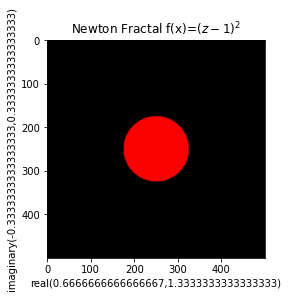

Z region from ( 0.75 , -0.25 ) to ( 1.25 , 0.25 )


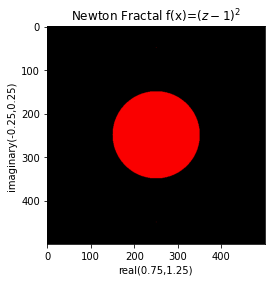

Z region from ( 0.8 , -0.2 ) to ( 1.2 , 0.2 )


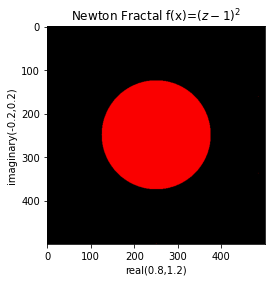

Z region from ( 0.9 , -0.1 ) to ( 1.1 , 0.1 )


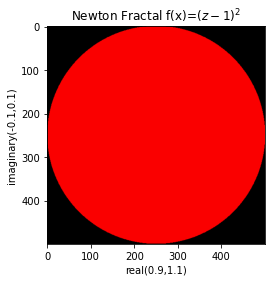

Z region from ( 0.99 , -0.01 ) to ( 1.01 , 0.01 )


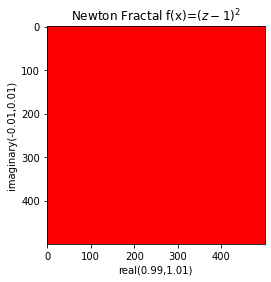

Z region from ( 0.999 , -0.001 ) to ( 1.001 , 0.001 )


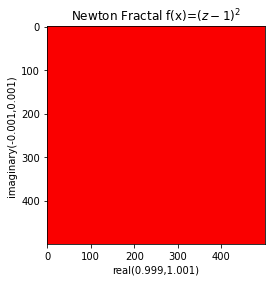

In [17]:
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

####$z^2-1 $

In [18]:

def f(z):
    return z**2-1

def df(z):
    return 2*z
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1, r2 = 1, -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0,255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal $f(x)=Z^2-1$')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


######Zoom out

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


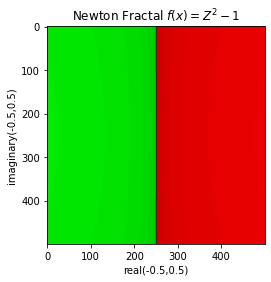

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


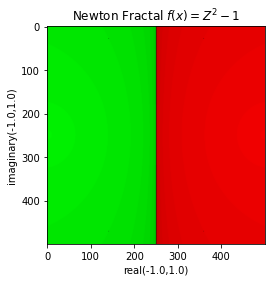

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


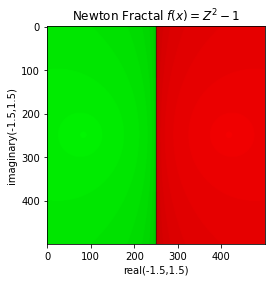

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


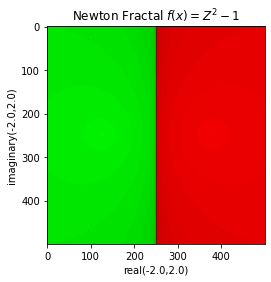

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


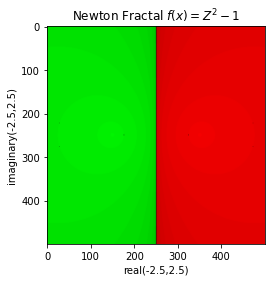

In [19]:

display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)


######Zoom in

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


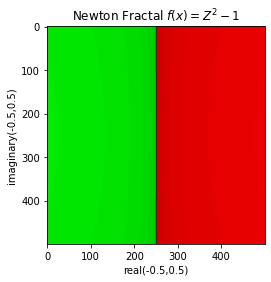

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


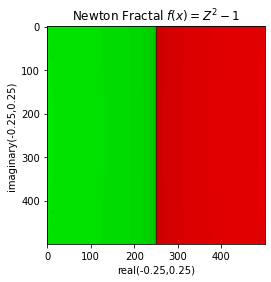

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


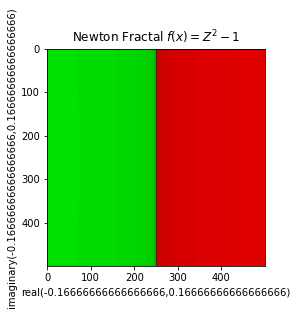

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


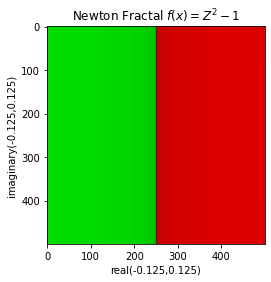

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


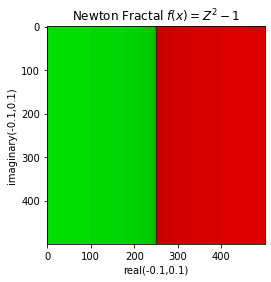

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


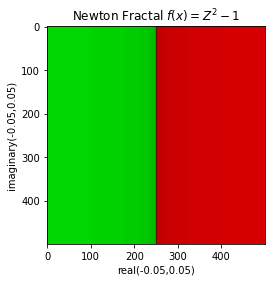

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


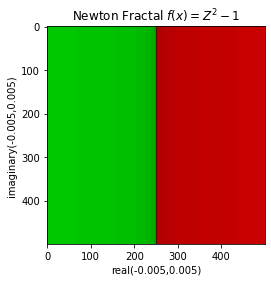

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


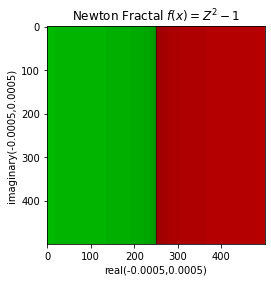

In [20]:
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

####$z^2+1 $

In [21]:

def f(z):
    return z**2+1

def df(z):
    return 2*z
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1, r2 = complex(0,1), complex(0,-1)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0,255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal $f(x)=Z^2-1$')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


######Zoom out

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


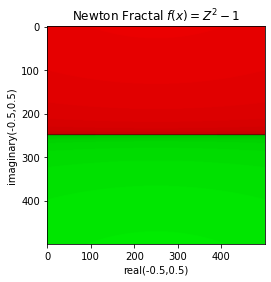

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


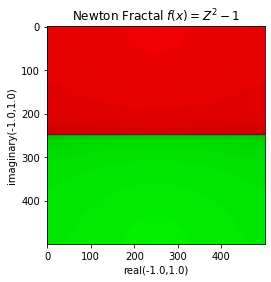

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


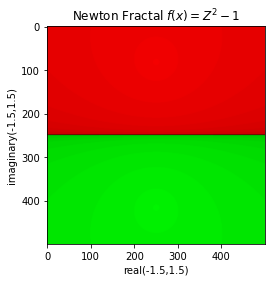

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


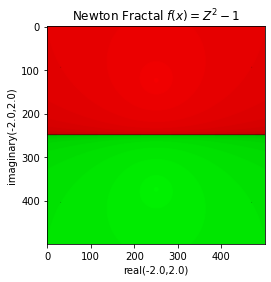

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


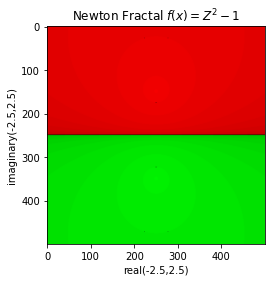

In [22]:

display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)


######Zoom in

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


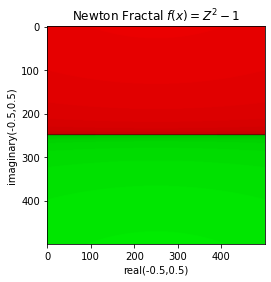

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


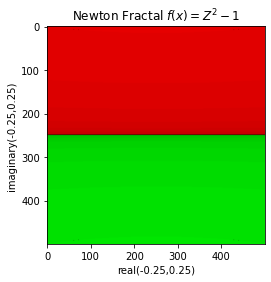

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


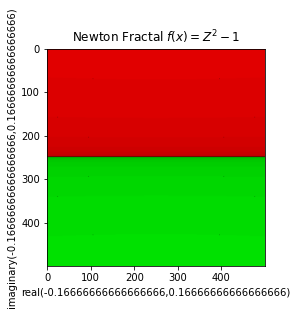

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


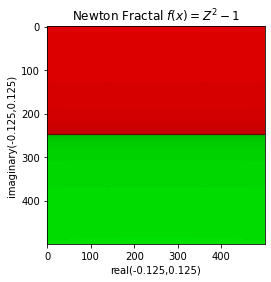

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


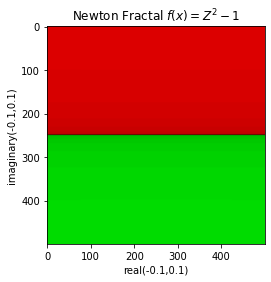

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


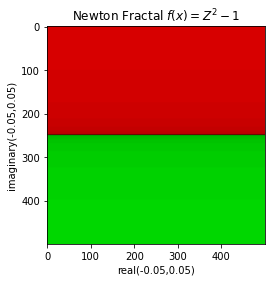

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


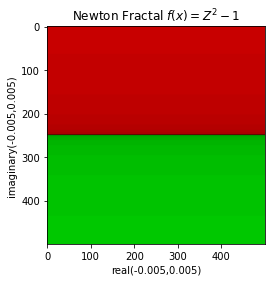

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


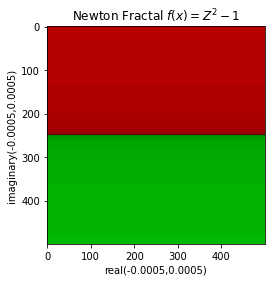

In [23]:
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

#Punto 4 y 5

####$z^2 $

In [24]:
def f(z):
    return z**2

def df(z):
    return 2*z


##### Newton iterates form z=10.0 + 0.0j

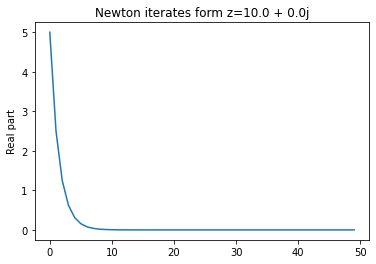

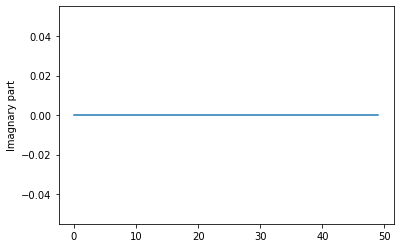

In [25]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

##### Newton iterates form z=-10.0 + 0.0j

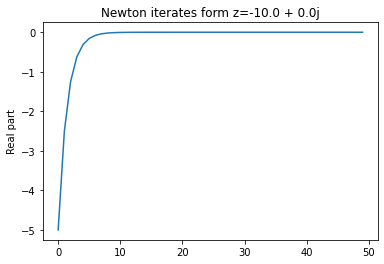

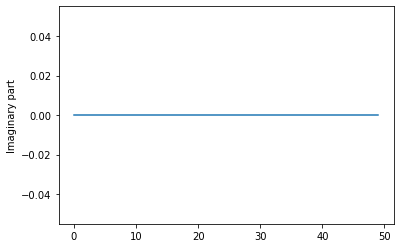

In [26]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 + 10.0j

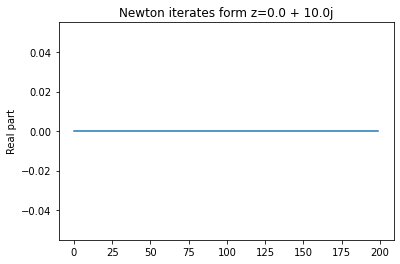

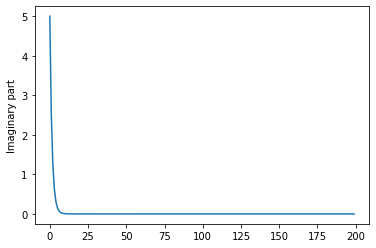

In [27]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 - 10.0j

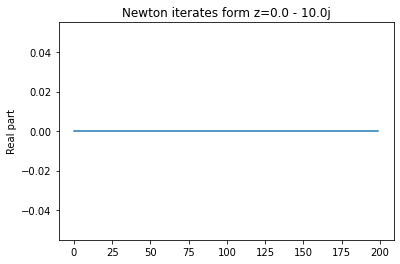

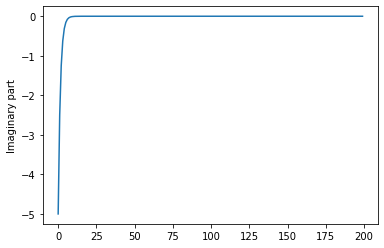

In [28]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 + 0.0j

In [29]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

####$(z-1)^2 $

In [30]:
def f(z):
    return (z-1)**2

def df(z):
    return 2*(z-1)


##### Newton iterates form z=10.0 + 0.0j

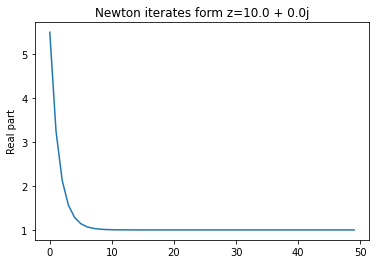

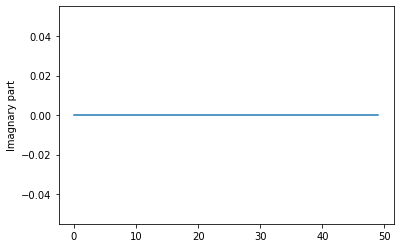

In [31]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

##### Newton iterates form z=-10.0 + 0.0j

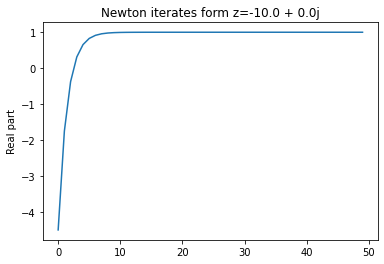

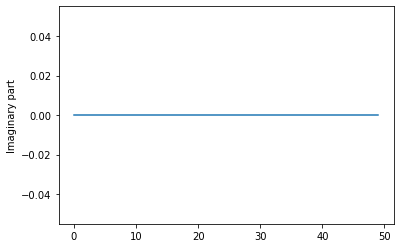

In [32]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 + 10.0j

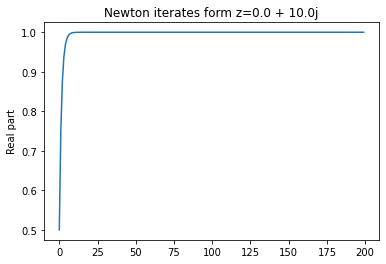

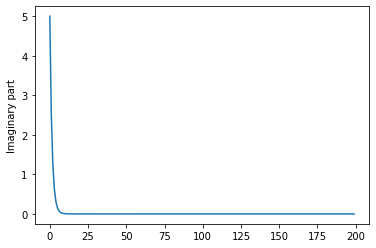

In [33]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 - 10.0j

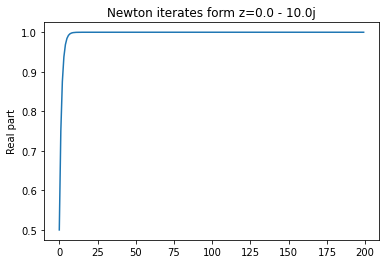

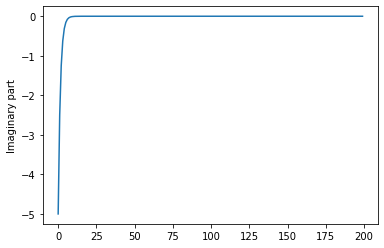

In [34]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 + 0.0j

In [35]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

####$z^2-1 $

In [36]:
def f(z):
    return z**2-1

def df(z):
    return 2*z


##### Newton iterates form z=10.0 + 0.0j

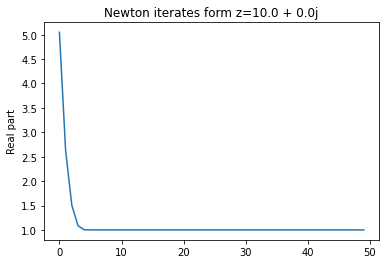

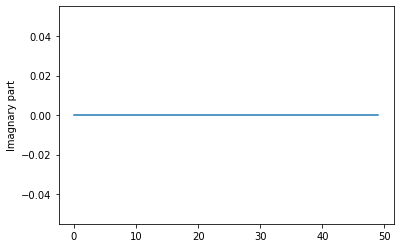

In [37]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

##### Newton iterates form z=-10.0 + 0.0j

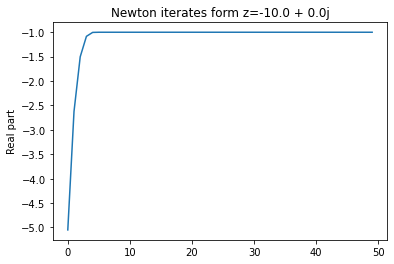

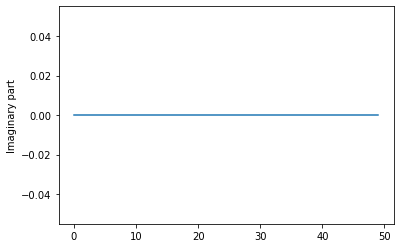

In [38]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 + 10.0j

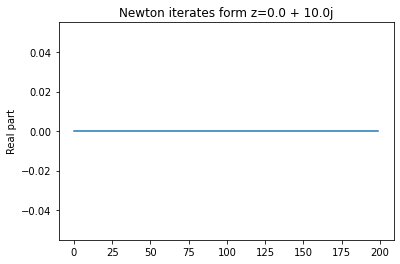

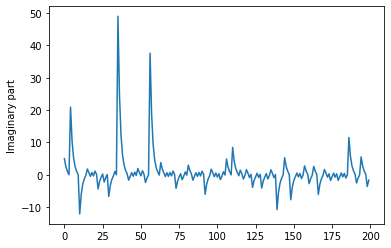

In [39]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 - 10.0j

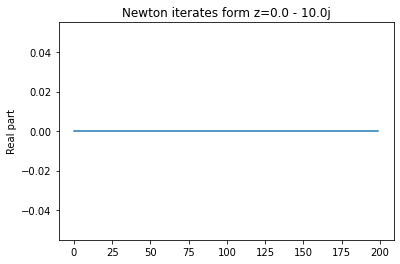

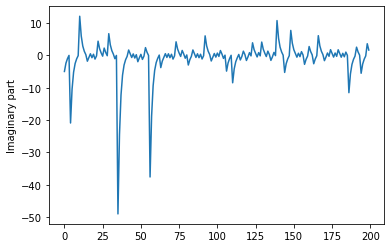

In [40]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 + 0.0j

In [41]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

####$z^2+1 $

In [42]:
def f(z):
    return z**2+1

def df(z):
    return 2*z


##### Newton iterates form z=10.0 + 0.0j

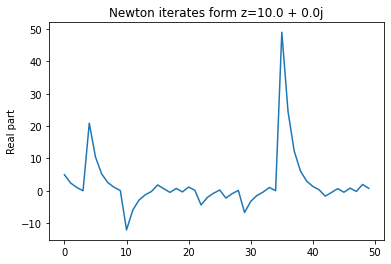

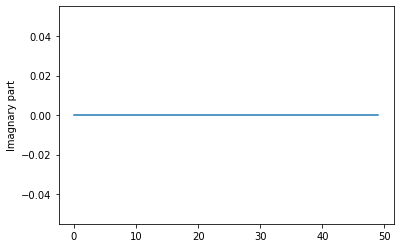

In [43]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

##### Newton iterates form z=-10.0 + 0.0j

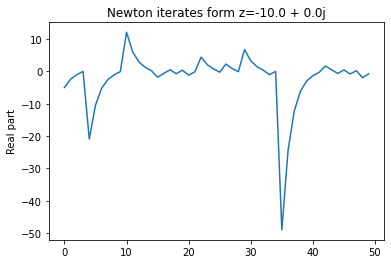

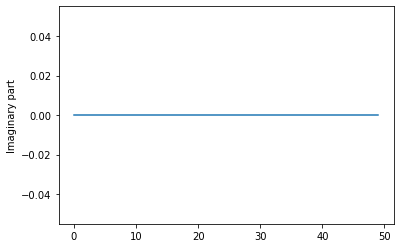

In [44]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 + 10.0j

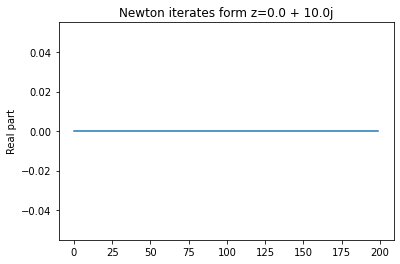

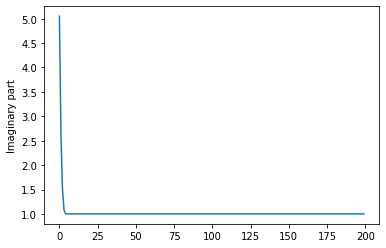

In [45]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 - 10.0j

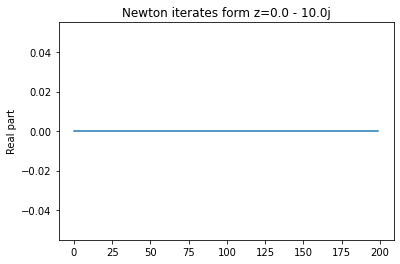

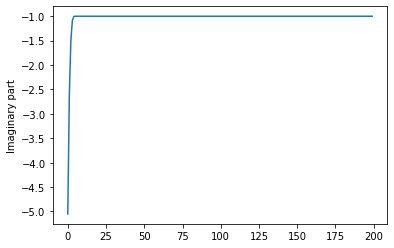

In [46]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

##### Newton iterates form z=0.0 + 0.0j

In [47]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored